## Iris con KMenas

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Cargar datos

In [2]:
data = sns.load_dataset('iris')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


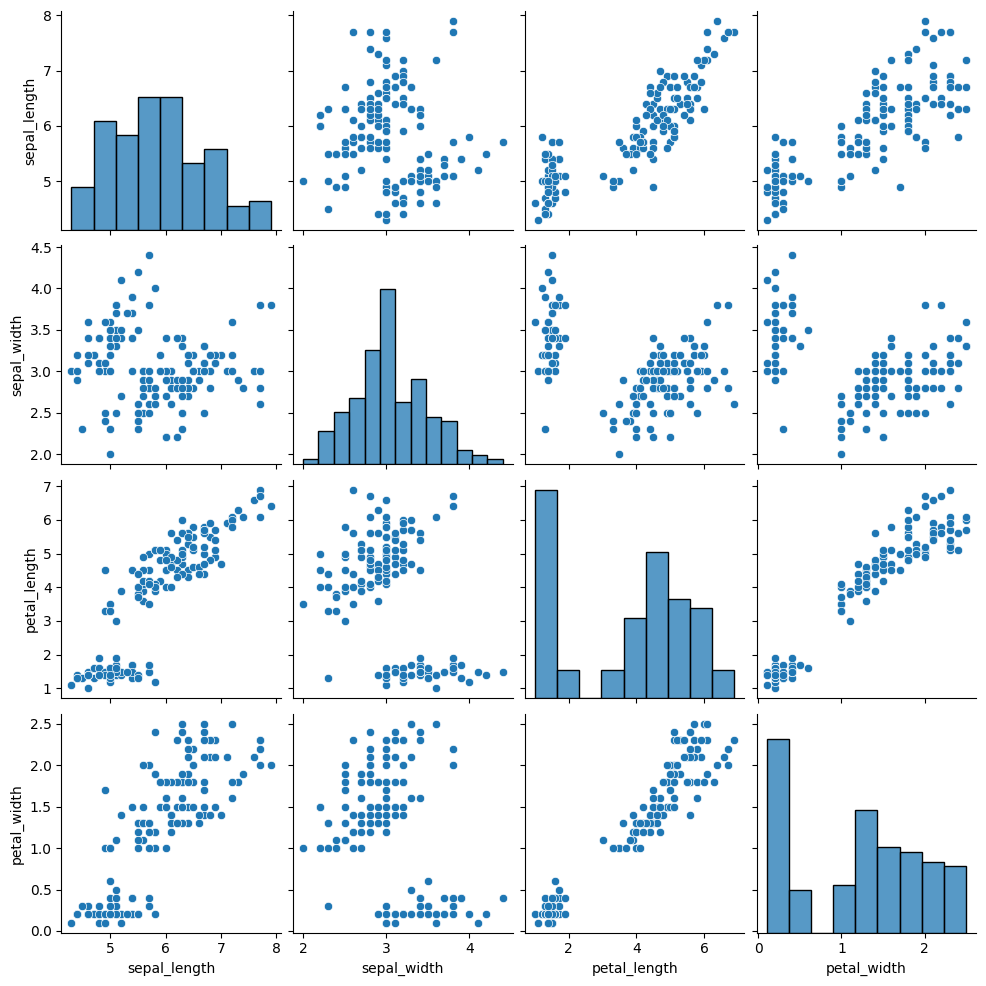

In [3]:
sns.pairplot(data=data)

In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


C:\Users\danie\AppData\Local\Temp\ipykernel_19636\2642705006.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrleacion = data.corr()


<AxesSubplot: >

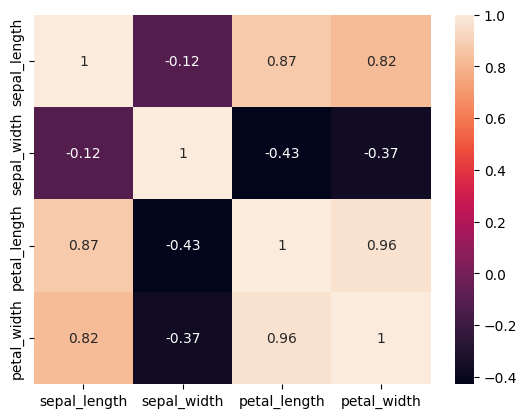

In [6]:
corrleacion = data.corr()
sns.heatmap(corrleacion,annot=True)

Text(0.5, 1.0, 'Scatter Plot')

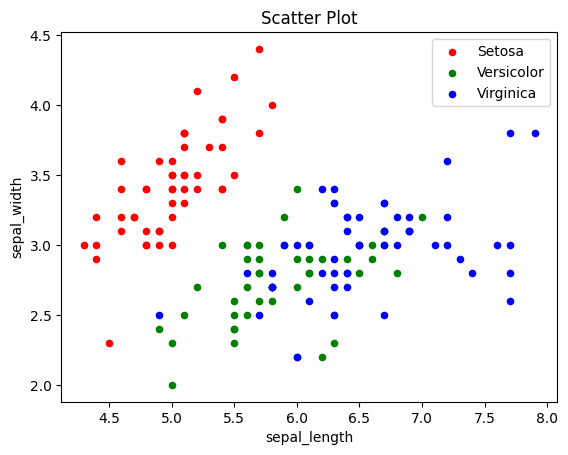

In [7]:
ax = data[data.species=='setosa'].plot.scatter(x='sepal_length', y='sepal_width', color='red', label='Setosa')
data[data.species=='versicolor'].plot.scatter(x='sepal_length', y='sepal_width',  color='green', label='Versicolor', ax=ax)
data[data.species=='virginica'].plot.scatter(x='sepal_length', y='sepal_width', color='blue', label='Virginica', ax=ax)
ax.set_title("Scatter Plot")

### Preprocesamiento

In [8]:
#Convertir specie en un numero clasificador
encoder = LabelEncoder()
data['species'] = encoder.fit_transform(data['species'])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
# escala de especies
np.unique(data['species'])

array([0, 1, 2])

In [10]:
#KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(data[['sepal_length','sepal_width']])



c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [11]:
data['Cluster2'] = kmeans.predict(data[['sepal_length','sepal_width']])
data.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [12]:
data.Cluster2.value_counts()

0    43
2    38
1    32
3    24
4    13
Name: Cluster2, dtype: int64

In [13]:
marcador = ['x', '*', '.', '|', '_']

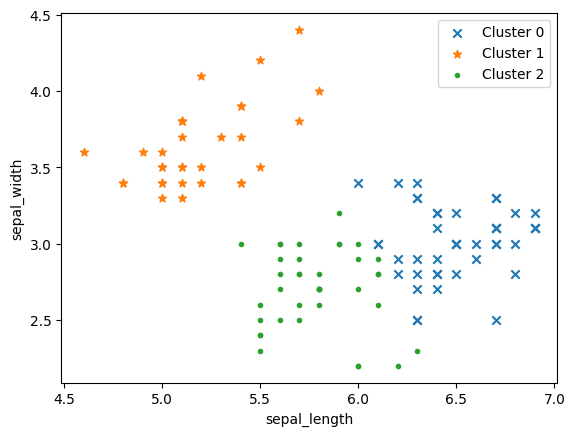

In [14]:
for species in range(3):
    temp = data[data.Cluster2 == species]
    plt.scatter(temp.sepal_length, temp.sepal_width, marker = marcador[species], label = 'Cluster '+ str(species))
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend();